In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import word_tokenize, ngrams
from nltk.corpus import stopwords

%matplotlib inline

# Load training set

In [2]:
data = pd.read_csv("../Dataset/train.csv")

In [3]:
data.head(6)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1


The training set contains 6 columns in total. Each columns will be desribed below:

Data fields:
1. id - the id of a training set question pair
2. qid1, qid2 - unique ids of each question (only available in train.csv)
3. question1, question2 - the full text of each question
4. is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

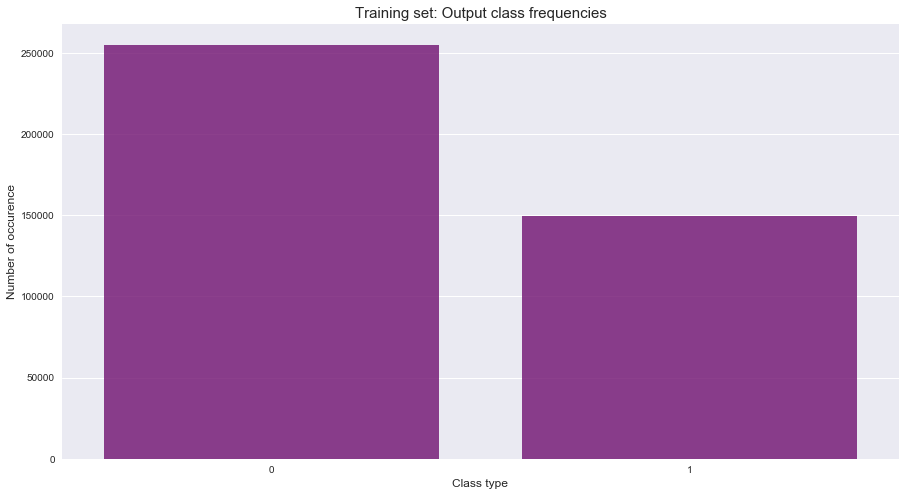

In [4]:
# compare and compare the distribution of 2 output class
output_counts = data["is_duplicate"].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(output_counts.index, output_counts.values, alpha=0.8, color="purple")
plt.title("Training set: Output class frequencies", fontsize=15)
plt.xlabel("Class type", fontsize=12)
plt.ylabel("Number of occurence", fontsize=12)
plt.show()

In [5]:
class_ratio = output_counts / output_counts.sum()

print("Class frequency:")
print(output_counts)
print("")
print("Class ratio:")
print(class_ratio)

Class frequency:
0    255027
1    149263
Name: is_duplicate, dtype: int64

Class ratio:
0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64


According to my analysis, there are 36.91% duplicate questions and 63.09% non-duplicate questions in the training set.

# Feature analysis: question1

In [6]:
# plot word count for question1
data["question1_word_count"] = data["question1"].apply(lambda x : len(str(x).split()))

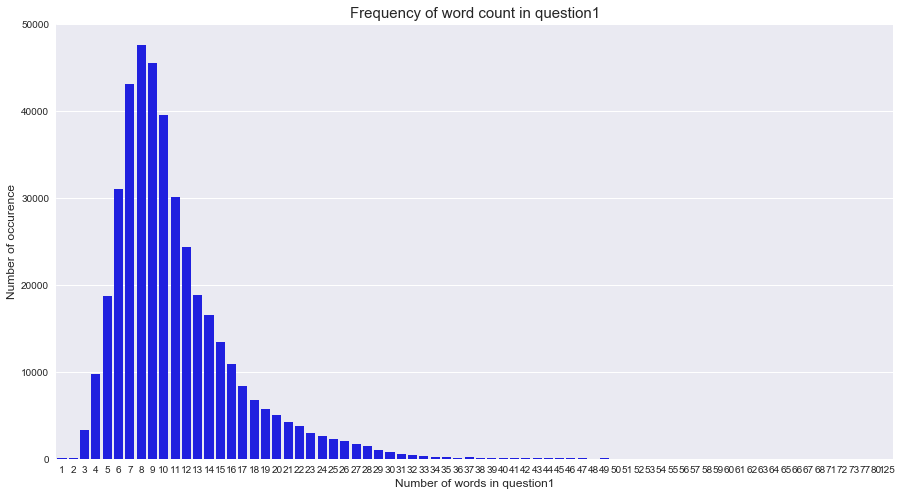

In [7]:
question1_wc_count = data["question1_word_count"].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(question1_wc_count.index, question1_wc_count.values, color="blue")
plt.title("Frequency of word count in question1", fontsize= 15)
plt.xlabel("Number of words in question1", fontsize=12)
plt.ylabel("Number of occurence", fontsize=12)
plt.show()

In general, most sentences come with 8 words. The distribution is right skewed.

In [8]:
# plot character count for question1
data["char_count_q1"] = data["question1"].apply(lambda x : len(str(x)))

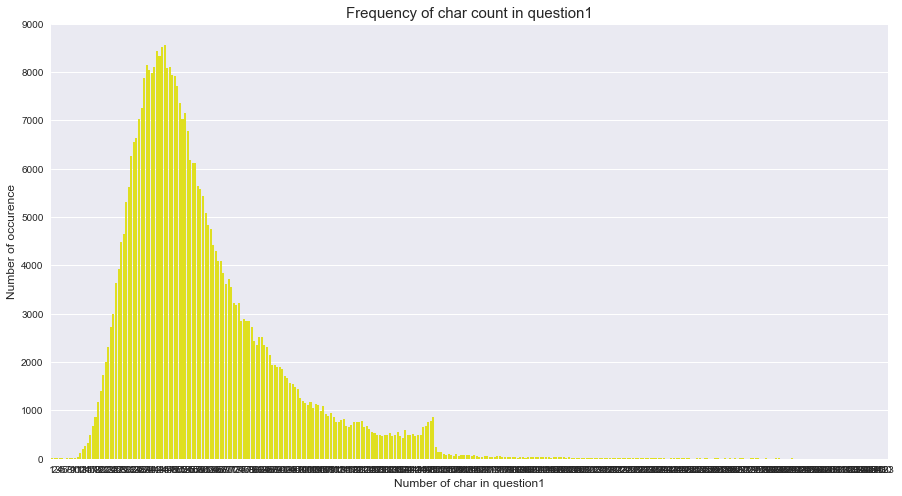

In [9]:
question1_char_count = data["char_count_q1"].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(question1_char_count.index, question1_char_count.values, color="yellow")
plt.title("Frequency of char count in question1", fontsize= 15)
plt.xlabel("Number of char in question1", fontsize=12)
plt.ylabel("Number of occurence", fontsize=12)
plt.show()

# Feature analysis: question2

In [10]:
# plot word count for question2
data["question2_word_count"] = data["question2"].apply(lambda x : len(str(x).split()))

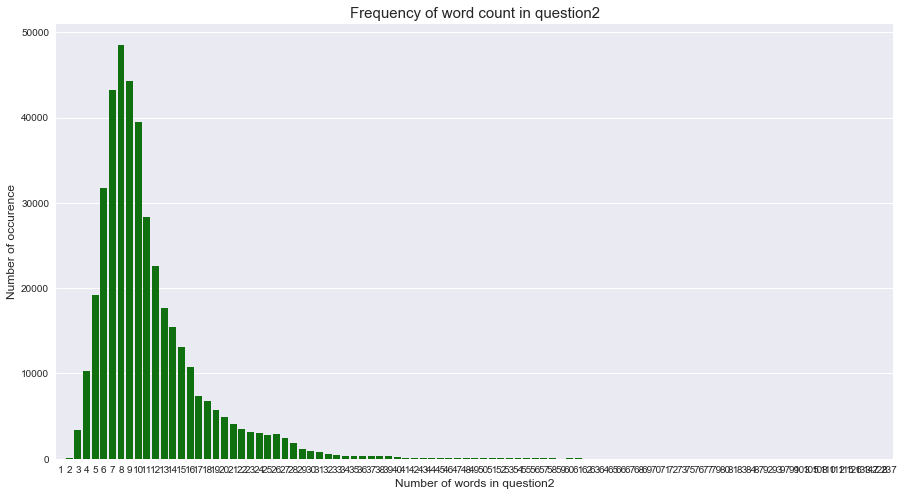

In [11]:
question2_wc_count = data["question2_word_count"].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(question2_wc_count.index, question2_wc_count.values, color="green")
plt.title("Frequency of word count in question2", fontsize= 15)
plt.xlabel("Number of words in question2", fontsize=12)
plt.ylabel("Number of occurence", fontsize=12)
plt.show()

The output of this graph is more or less similar to the previous analysis.

In [12]:
# plot character count for question2
data["char_count_q2"] = data["question2"].apply(lambda x : len(str(x)))

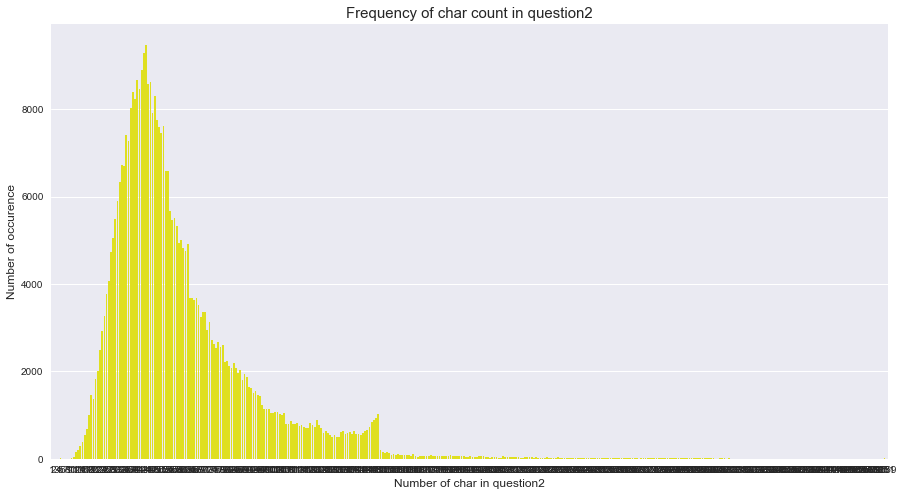

In [13]:
question2_char_count = data["char_count_q2"].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(question2_char_count.index, question2_char_count.values, color="yellow")
plt.title("Frequency of char count in question2", fontsize= 15)
plt.xlabel("Number of char in question2", fontsize=12)
plt.ylabel("Number of occurence", fontsize=12)
plt.show()

# Feature analysis: Heatmap

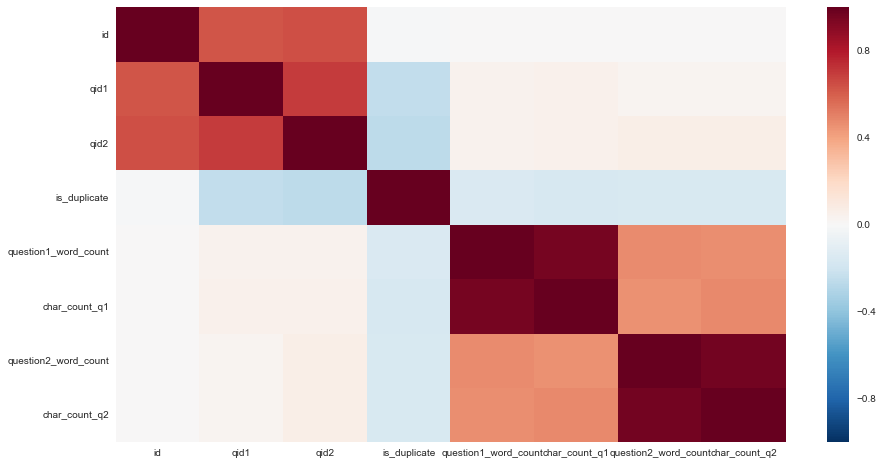

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr("pearson"))
plt.show()

It can be observed that question1 and question2 are missing from this heatmap. This is mainly because seaborn's heatmap analysis only take numbers into account instead of string.

# Wordcloud

(-0.5, 1919.5, 1079.5, -0.5)

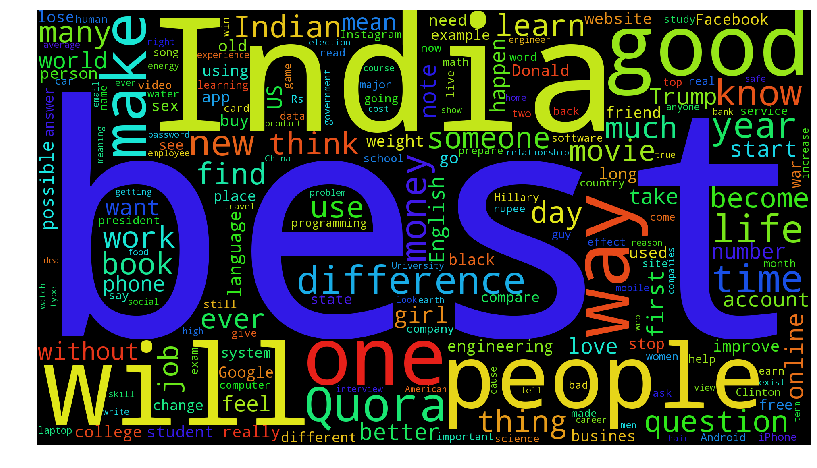

In [15]:
from wordcloud import WordCloud

# generate common words for question1 via wordcloud
cloud_1 = WordCloud(width=1920, height=1080).generate(" ".join(data["question1"].astype(str)))
plt.figure(figsize=(15, 8))
plt.imshow(cloud_1)
plt.axis('off')

Common words for question1 are "best", India", "will", "good", "people" and so on.

(-0.5, 1919.5, 1079.5, -0.5)

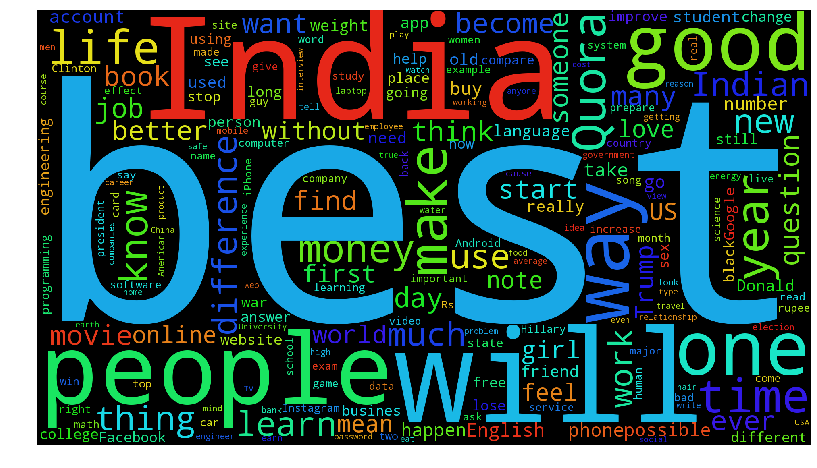

In [16]:
# generate common words for question2 via wordcloud
cloud_2 = WordCloud(width=1920, height=1080).generate(" ".join(data["question2"].astype(str)))
plt.figure(figsize=(15, 8))
plt.imshow(cloud_2)
plt.axis('off')

Common words for question2 are "best", India", "will", "good", "way" and so on.